# Classification with Decision Trees and KNN

You will be using the loan dataset. Download the dataset and place the CSV file in your working directory.

### Import necessary libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd

# Machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

### Question 1: Decision Tree Classifiers

Step 1: Load the dataset

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/_K5ckPzlRq6Jc70VwXEXjQ_088280c5983c43d38005099688a5e9f1_loan_dataset.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Dataset Preview:")
print(df.head())

# Check the data types and missing values
print("\nDataset Information:")
print(df.info())

# Display basic statistics
print("\nDataset Statistics:")
print(df.describe())


Dataset Preview:
   Age  Salary  Has_Loan
0   52   97750         1
1   30   58527         0
2   37   93150         0
3   58   76996         1
4   27   32124         0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       100 non-null    int64
 1   Salary    100 non-null    int64
 2   Has_Loan  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

Dataset Statistics:
              Age         Salary    Has_Loan
count  100.000000     100.000000  100.000000
mean    40.020000   77241.910000    0.340000
std     11.530355   25455.493053    0.476095
min     20.000000   32124.000000    0.000000
25%     30.000000   53972.250000    0.000000
50%     39.000000   80499.000000    0.000000
75%     51.000000   96277.750000    1.000000
max     59.000000  118742.000000    1.000000


Step 2: Preprocess the dataset
- Using the *df.isnull().sum()* function, identify columns with missing values. In this dataset, the columns RankSeason, RankPlayoffs, OOBP, and OSLG have a majority of their values missing. For this exercise, drop these columns from the dataset to simplify the analysis.
- Encode categorical variables using label encoding.

{accuracy: 3}

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values
print("Missing Values:")
print(df.isnull().sum())
# add code here

#Drop Columns with Missing Values
#columns_to_drop = ['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']
#df = df.drop(columns=columns_to_drop, axis=1)

# Encode categorical variables

#intialize labelencoder
label_encoder = LabelEncoder()

#categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Scale features using StandardScaler()
#initialize standardscaler

scaler = StandardScaler()

#numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#scale numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#preview processed data
print(df.head())

Missing Values:
Age         0
Salary      0
Has_Loan    0
dtype: int64
        Age    Salary  Has_Loan
0  1.044231  0.809704  1.393261
1 -0.873388 -0.738905 -0.717741
2 -0.263237  0.628086 -0.717741
3  1.567218 -0.009709  1.393261
4 -1.134882 -1.781352 -0.717741


Step 3: Split the dataset into training and testing sets

{accuracy: 2}

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
target_column = 'Has_Loan'
X = df.drop(columns=[target_column], axis=1)
y = df[target_column]
# Split the dataset using test_size = 0.2 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display results
print("Training set shape")
from sklearn.model_selection import train_test_split

# Define features and target
target_column = 'Has_Loan'
X = df.drop(columns=[target_column], axis=1)
y = df[target_column]
# Split the dataset using test_size = 0.2 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display results
print("Training set shape")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nTesting set shape")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape
Training set shape
X_train: (80, 2), y_train: (80,)

Testing set shape
X_test: (20, 2), y_test: (20,)


Step 4: Train Decision Tree classifiers with different max_depth values

{accuracy: 4}

In [ ]:
print("Unique values in the target column:")
print(y.unique())


Unique values in the target column:
[ 1.39326109 -0.71774056]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target column if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset again with the encoded target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define max_depth values
max_depth_values = [3, 5, 7, 10]

# Train and evaluate Decision Tree classifiers
for max_depth in max_depth_values:
    print(f"Training Decision Tree with max_depth = {max_depth}...")

    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model using the training data
    model.fit(X_train, y_train)


    # Predict the labels for the training and the testing data

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the error on the training and the testing data

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the results
    print(f"Decision Tree with max_depth={max_depth}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print()

Training Decision Tree with max_depth = 3...
Decision Tree with max_depth=3:
Training Accuracy: 0.7250
Testing Accuracy: 0.6000

Training Decision Tree with max_depth = 5...
Decision Tree with max_depth=5:
Training Accuracy: 0.8000
Testing Accuracy: 0.6000

Training Decision Tree with max_depth = 7...
Decision Tree with max_depth=7:
Training Accuracy: 0.8500
Testing Accuracy: 0.6000

Training Decision Tree with max_depth = 10...
Decision Tree with max_depth=10:
Training Accuracy: 0.8750
Testing Accuracy: 0.6000



Step 5: Reduce dimensionality using PCA and visualize decision boundaries

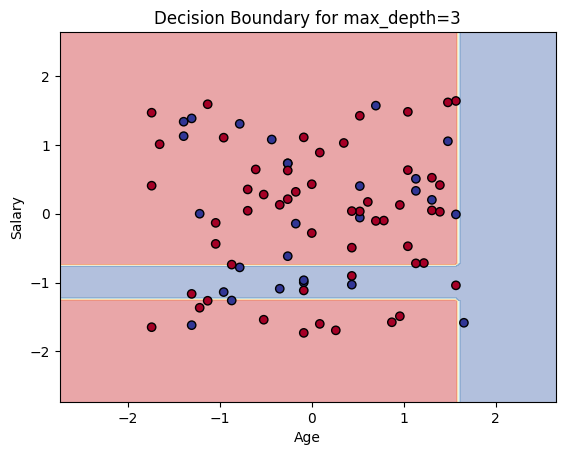

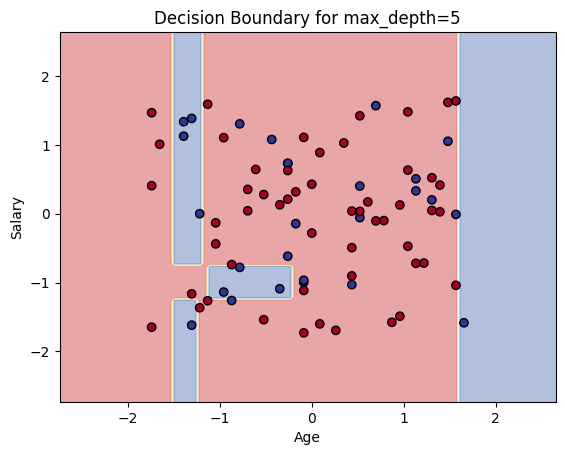

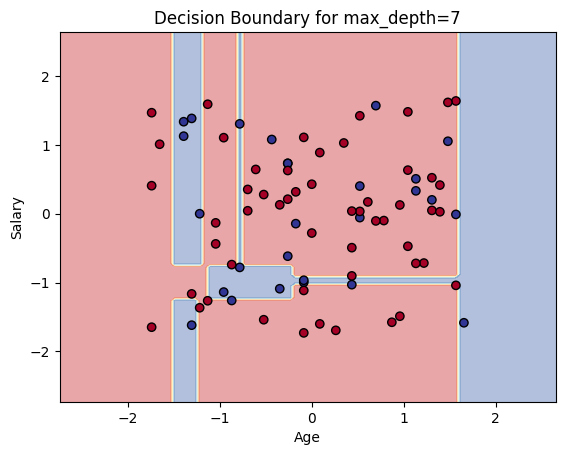

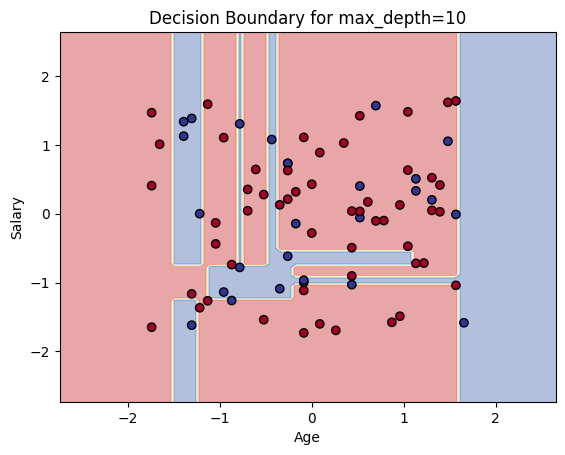

In [ ]:
# Visualize Decision Tree classifiers with different max_depth values
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Plot the decision boundary using DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(model, X_train, response_method="predict", cmap=plt.cm.RdYlBu, alpha=0.4)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f'Decision Boundary for max_depth={max_depth}')
    plt.show()

In [ ]:
X_train.iloc[:,0]

,Age
55,1.305724
88,-0.263237
26,-0.088908
42,-0.263237
69,0.521244
...,...
60,1.305724
71,1.480053
14,0.957066
92,-1.745034


Step 6: Comment on the complexity of each model based on decision boundaries using a markdown cell

{reasoning: 2}

Max Depth = 3

This model has smooth and simple decision boundaries.

Max Depth = 5

This model has more refined decision boundaries, the increased complexity does a good job of capturing the data structure.

Max Depth = 7

The increased depth also increases the complexity of our decision boundaries. This depth might overfit our training data.

Max Depth = 10

These decision boundaries are the most complex and closely fits our training data. This Depth is the most likely to overfit our training data.



### Question 2: K-Nearest Neighbors (KNN) Classifiers

Step 1: Train KNN classifiers with different n_neighbors values

{accuracy: 3}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define n_neighbors values
n_neighbors_values = [3, 5, 7, 10]

# Train and evaluate KNN classifiers
for n_neighbors in n_neighbors_values:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit the model using the training data

    model.fit(X_train, y_train)

    # Predict the labels for the training and the testing data

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the error on the training and the testing data

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"n_neighbors: {n_neighbors}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}\n")

n_neighbors: 3
Training Accuracy: 0.7750
Testing Accuracy: 0.6000

n_neighbors: 5
Training Accuracy: 0.7000
Testing Accuracy: 0.6000

n_neighbors: 7
Training Accuracy: 0.7125
Testing Accuracy: 0.5000

n_neighbors: 10
Training Accuracy: 0.7000
Testing Accuracy: 0.6000



Step 2: Visualize decision boundaries

{accuracy: 2}

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on training and testing data
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA completed. Reduced training data shape:", X_train_pca.shape)


PCA completed. Reduced training data shape: (80, 2)


Visualizing KNN Classifier with n_neighbors = 3...


<Figure size 800x600 with 0 Axes>

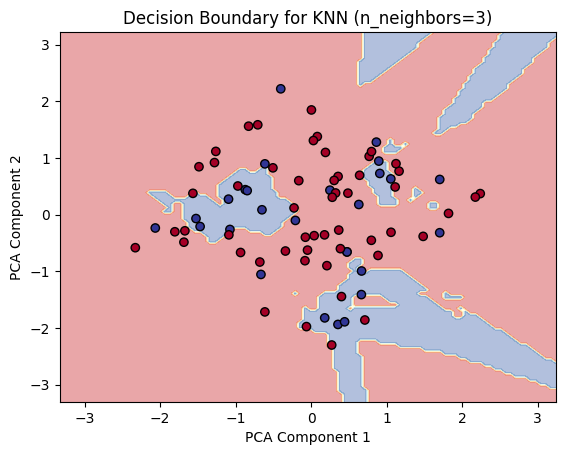

Visualizing KNN Classifier with n_neighbors = 5...


<Figure size 800x600 with 0 Axes>

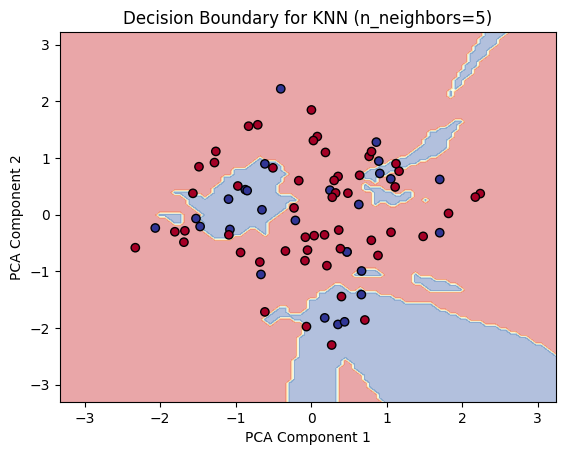

Visualizing KNN Classifier with n_neighbors = 7...


<Figure size 800x600 with 0 Axes>

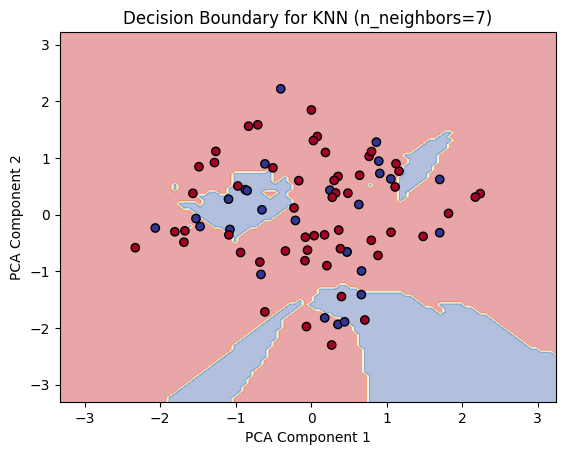

Visualizing KNN Classifier with n_neighbors = 10...


<Figure size 800x600 with 0 Axes>

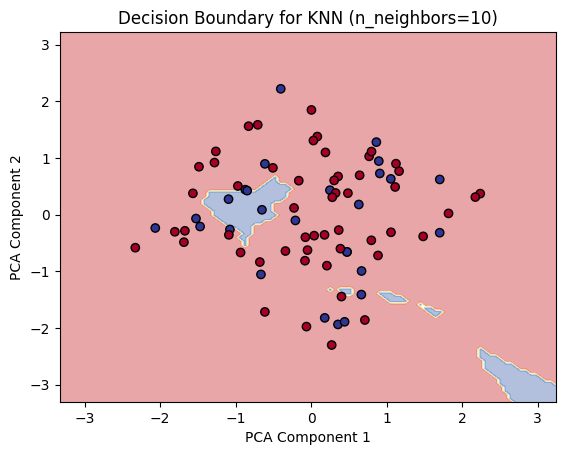

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Visualize KNN classifiers with different n_neighbors values usung the PCA reduced X train

for n_neighbors in n_neighbors_values:
    print(f"Visualizing KNN Classifier with n_neighbors = {n_neighbors}...")

    # Train the KNN classifier
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_pca, y_train)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train_pca,
        response_method="predict",
        cmap=plt.cm.RdYlBu,
        alpha=0.4
    )

    # Plot the PCA-reduced training data
    plt.scatter(
        X_train_pca[:, 0],  # First PCA component
        X_train_pca[:, 1],  # Second PCA component
        c=y_train,
        edgecolor='k',
        cmap=plt.cm.RdYlBu
    )
    plt.title(f'Decision Boundary for KNN (n_neighbors={n_neighbors})')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

Step 3: Comment on the complexity of each model based on decision boundaries using a markdown cell

{reasoning: 2}

KNN = 3

This model is complex and likely follows the training data closely. This likely indicates a complex and intricate model with a great deal of risk for overfitting.

KNN = 5

This is a smoother and less complex model, which is less likely to overfit a noisy model.

KNN = 7

This model is even smoother, but at this stage it might miss finer details in our dataset.

KNN = 10

This is the smoothest model we have, indicating it has the lowest complexity. The risk with this model, is of underfitting our data.

### Question 3: Decision Trees with Varying Depths

Step 1: Fit Decision Tree classifiers with max_depth values from 1 to 25

{accuracy: 2}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_range = range(1, 26)
train_errors = []
test_errors = []

for max_depth in max_depth_range:
    # Initialize the Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store errors (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Display the results
print("Training Errors:", train_errors)
print("Testing Errors:", test_errors)


Training Errors: [0.3125, 0.3125, 0.275, 0.23750000000000004, 0.19999999999999996, 0.16249999999999998, 0.15000000000000002, 0.13749999999999996, 0.13749999999999996, 0.125, 0.08750000000000002, 0.07499999999999996, 0.07499999999999996, 0.03749999999999998, 0.025000000000000022, 0.012499999999999956, 0.012499999999999956, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Testing Errors: [0.4, 0.4, 0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


Step 2: Plot two curves for training and testing errors with max_depth on the x-axis and error on the y-axis.

{accuracy: 2}

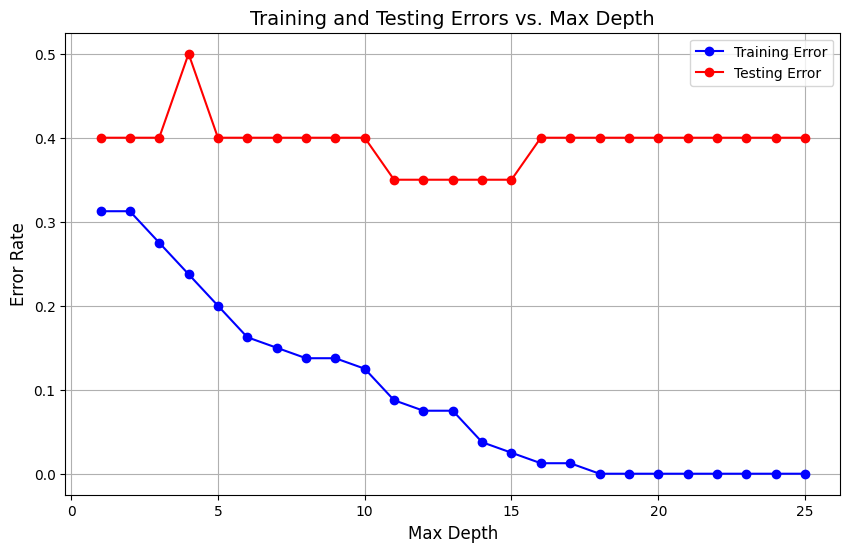

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and testing errors
plt.figure(figsize=(10, 6))

# Plot training errors
plt.plot(max_depth_range, train_errors, label='Training Error', marker='o', linestyle='-', color='blue')

# Plot testing errors
plt.plot(max_depth_range, test_errors, label='Testing Error', marker='o', linestyle='-', color='red')

# Add labels, title, and legend
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Training and Testing Errors vs. Max Depth', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()


Step 3: Identify and explain the best depth using a markdown cell

{reasoning: 1}

The best Max Depth appears to be 15. At this depth we have acheived a minimization of the testing error, with a nearly zero training error.

### Question 4: Cross-Validation for Decision Trees

Use cross-validation to verify optimal depth and report the cross-validation scores and the mean score.

{accuracy: 2}

In [ ]:
optimal_depth = max_depth_range[np.argmin(test_errors)]

from sklearn.model_selection import cross_val_score
import numpy as np

# Determine the optimal depth based on testing error
optimal_depth = max_depth_range[np.argmin(test_errors)]
print(f"Optimal Depth (from testing errors): {optimal_depth}")

# Initialize the Decision Tree with the optimal depth
model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)

# Print Results
print(f"Cross-Validation Scores (5-fold): {cv_scores}")
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")


Optimal Depth (from testing errors): 11
Cross-Validation Scores (5-fold): [0.5    0.625  0.375  0.75   0.6875]
Mean Cross-Validation Score: 0.5875
